# # # # Question:

### You are given a dataset containing two features: sepal length and sepal width of Iris flowers, and a binary label indicating whether the flower is of type Iris Setosa or Iris Versicolor.

### Using SVM with a linear kernel, perform the following tasks:

### Preprocess the data:
#### a. Load the dataset.
#### b. Extract only the Setosa and Versicolor classes.
#### c. Standardize the features.

### Train a linear SVM classifier and find the optimal separating hyperplane.

### Visualize the decision boundary along with the support vectors.

### Report the accuracy of the classifier on the training set.

__________________________________________________________________________________________________________________________________________________________
#### Sol:
__________________________________________________________________________________________________________________________________________________________

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [46]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns =iris.feature_names)
data['target'] = iris.target

In [48]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [56]:
data = data[data['target'].isin([0,1])]

In [58]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [62]:
x = data[['sepal length (cm)', 'sepal width (cm)']].values
y = data['target'].values

In [64]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [72]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(x, y)

SVC(kernel='linear')

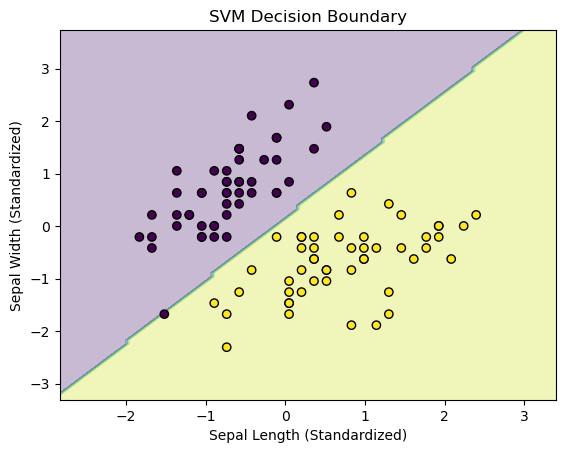

In [74]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel("Sepal Length (Standardized)")
    plt.ylabel("Sepal Width (Standardized)")
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(model, X, y)